In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams["axes.labelsize"] = 14
matplotlib.rcParams["xtick.labelsize"] = 12
matplotlib.rcParams["ytick.labelsize"] = 12
matplotlib.rcParams["text.color"] = 'k'

In [2]:
df = pd.read_csv("train_Tme series.csv")

In [3]:
df.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       26496 non-null  int64  
 1   datetime                 26496 non-null  object 
 2   temperature              26496 non-null  float64
 3   var1                     26496 non-null  float64
 4   pressure                 26496 non-null  float64
 5   windspeed                26496 non-null  float64
 6   var2                     26496 non-null  object 
 7   electricity_consumption  26496 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.6+ MB


In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [6]:
(75/100)*26496

19872.0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       26496 non-null  int64         
 1   datetime                 26496 non-null  datetime64[ns]
 2   temperature              26496 non-null  float64       
 3   var1                     26496 non-null  float64       
 4   pressure                 26496 non-null  float64       
 5   windspeed                26496 non-null  float64       
 6   var2                     26496 non-null  object        
 7   electricity_consumption  26496 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 1.6+ MB


In [8]:
df['datetime'].min(),df['datetime'].max()

(Timestamp('2013-07-01 00:00:00'), Timestamp('2017-06-23 23:00:00'))

In [9]:
cols = ['ID','temperature','pressure','var1','windspeed','var2']
Amount_in_hour_train =df.drop(cols,axis=1)

In [10]:
Amount_in_hour_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   datetime                 26496 non-null  datetime64[ns]
 1   electricity_consumption  26496 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 414.1 KB


In [11]:
Time_stuff_train = Amount_in_hour_train.sort_values('datetime')


In [12]:
Time_stuff_train.isnull().sum()


datetime                   0
electricity_consumption    0
dtype: int64

In [13]:
Time_stuff_train = Time_stuff_train.groupby('datetime')['electricity_consumption'].sum().reset_index()

In [14]:
Time_stuff_train.set_index('datetime', inplace=True)


In [15]:
Time_stuff_train.index

DatetimeIndex(['2013-07-01 00:00:00', '2013-07-01 01:00:00',
               '2013-07-01 02:00:00', '2013-07-01 03:00:00',
               '2013-07-01 04:00:00', '2013-07-01 05:00:00',
               '2013-07-01 06:00:00', '2013-07-01 07:00:00',
               '2013-07-01 08:00:00', '2013-07-01 09:00:00',
               ...
               '2017-06-23 14:00:00', '2017-06-23 15:00:00',
               '2017-06-23 16:00:00', '2017-06-23 17:00:00',
               '2017-06-23 18:00:00', '2017-06-23 19:00:00',
               '2017-06-23 20:00:00', '2017-06-23 21:00:00',
               '2017-06-23 22:00:00', '2017-06-23 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=26496, freq=None)

In [16]:
y = Time_stuff_train['electricity_consumption'].resample('MS').mean()

In [17]:
#X = Time_stuff_train['datetime']

In [18]:
#X_test = Time_stuff_test['datetime']

In [19]:
#y_test = Time_stuff_test['electricity_consumption'].resample('MS').mean()

In [20]:
y['2015']

datetime
2015-01-01    285.233696
2015-02-01    286.418478
2015-03-01    271.369565
2015-04-01    294.320652
2015-05-01    286.048913
2015-06-01    319.201087
2015-07-01    386.114130
2015-08-01    305.385870
2015-09-01    344.820652
2015-10-01    268.918478
2015-11-01    294.108696
2015-12-01    306.364130
Freq: MS, Name: electricity_consumption, dtype: float64

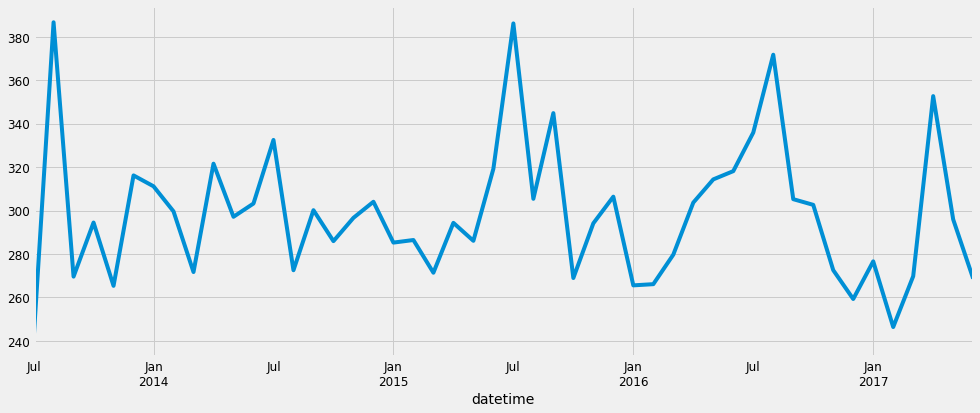

In [21]:
y.plot(figsize=(15,6))
plt.show()

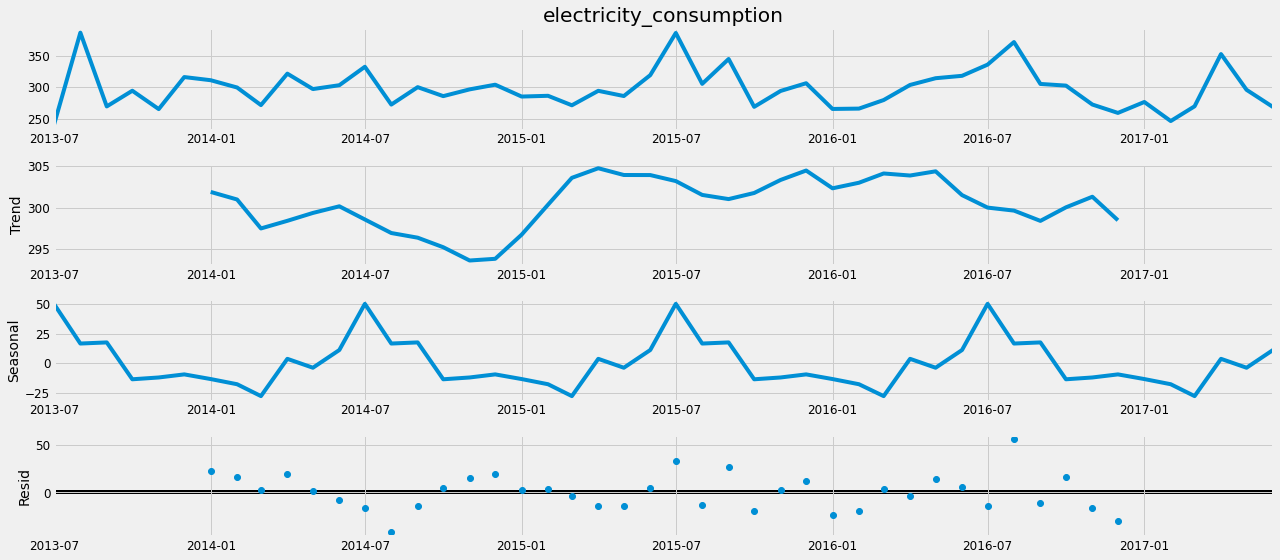

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

In [23]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0] , x[1] , x[2] , 12) for x in list(itertools.product(p,d,q))]

In [24]:
print("Example of parameter combination seasonal ARIMA")
print("SARIMAX : {} x {}".format(pdq[1], seasonal_pdq[1]))
print("SARIMAX : {} x {}".format(pdq[1], seasonal_pdq[2]))
print("SARIMAX : {} x {}".format(pdq[2], seasonal_pdq[3]))
print("SARIMAX : {} x {}".format(pdq[2], seasonal_pdq[4]))

Example of parameter combination seasonal ARIMA
SARIMAX : (0, 0, 1) x (0, 0, 1, 12)
SARIMAX : (0, 0, 1) x (0, 1, 0, 12)
SARIMAX : (0, 1, 0) x (0, 1, 1, 12)
SARIMAX : (0, 1, 0) x (1, 0, 0, 12)


In [25]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = model.fit()
            print("ARIMAX {} x {} - AIC {} :".format(param,param_seasonal,results.aic))
        except:
            continue

ARIMAX (0, 0, 0) x (0, 0, 0, 12) - AIC 671.9186326628749 :


C:\Users\CLASSISH\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 0, 0) x (0, 0, 1, 12) - AIC 1441.4910704640631 :
ARIMAX (0, 0, 0) x (0, 1, 0, 12) - AIC 350.499189536049 :
ARIMAX (0, 0, 0) x (0, 1, 1, 12) - AIC 224.13514378701086 :
ARIMAX (0, 0, 0) x (1, 0, 0, 12) - AIC 367.7095729533214 :


C:\Users\CLASSISH\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 0, 0) x (1, 0, 1, 12) - AIC 1281.0408235717985 :
ARIMAX (0, 0, 0) x (1, 1, 0, 12) - AIC 239.9240102467783 :
ARIMAX (0, 0, 0) x (1, 1, 1, 12) - AIC 228.0655529097949 :
ARIMAX (0, 0, 1) x (0, 0, 0, 12) - AIC 603.3388085688762 :


C:\Users\CLASSISH\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 0, 1) x (0, 0, 1, 12) - AIC 2669.895909811726 :
ARIMAX (0, 0, 1) x (0, 1, 0, 12) - AIC 329.79008592386566 :
ARIMAX (0, 0, 1) x (0, 1, 1, 12) - AIC 218.3535070513991 :
ARIMAX (0, 0, 1) x (1, 0, 0, 12) - AIC 364.4657693051182 :


C:\Users\CLASSISH\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 0, 1) x (1, 0, 1, 12) - AIC 2514.306580442308 :
ARIMAX (0, 0, 1) x (1, 1, 0, 12) - AIC 241.0734436479368 :
ARIMAX (0, 0, 1) x (1, 1, 1, 12) - AIC 220.32362493090056 :
ARIMAX (0, 1, 0) x (0, 0, 0, 12) - AIC 470.2894680952822 :


C:\Users\CLASSISH\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 1, 0) x (0, 0, 1, 12) - AIC 1393.441877164959 :
ARIMAX (0, 1, 0) x (0, 1, 0, 12) - AIC 365.07724143586046 :
ARIMAX (0, 1, 0) x (0, 1, 1, 12) - AIC 229.03427932628148 :
ARIMAX (0, 1, 0) x (1, 0, 0, 12) - AIC 356.25883267978475 :


C:\Users\CLASSISH\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 1, 0) x (1, 0, 1, 12) - AIC 1395.3709347310164 :
ARIMAX (0, 1, 0) x (1, 1, 0, 12) - AIC 248.90193691525167 :
ARIMAX (0, 1, 0) x (1, 1, 1, 12) - AIC 232.45486674280122 :
ARIMAX (0, 1, 1) x (0, 0, 0, 12) - AIC 439.39244628160174 :


C:\Users\CLASSISH\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 1, 1) x (0, 0, 1, 12) - AIC 1337.1526157685664 :
ARIMAX (0, 1, 1) x (0, 1, 0, 12) - AIC 324.1647264769162 :
ARIMAX (0, 1, 1) x (0, 1, 1, 12) - AIC 205.19597348048663 :
ARIMAX (0, 1, 1) x (1, 0, 0, 12) - AIC 348.3928405796297 :


C:\Users\CLASSISH\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 1, 1) x (1, 0, 1, 12) - AIC 1089.7061587555045 :
ARIMAX (0, 1, 1) x (1, 1, 0, 12) - AIC 231.40653478817777 :
ARIMAX (0, 1, 1) x (1, 1, 1, 12) - AIC 207.19554531532677 :
ARIMAX (1, 0, 0) x (0, 0, 0, 12) - AIC 493.67233768417043 :
ARIMAX (1, 0, 0) x (0, 0, 1, 12) - AIC 1567.8807277371016 :
ARIMAX (1, 0, 0) x (0, 1, 0, 12) - AIC 346.55882524947486 :
ARIMAX (1, 0, 0) x (0, 1, 1, 12) - AIC 225.8452775254821 :
ARIMAX (1, 0, 0) x (1, 0, 0, 12) - AIC 357.873199500621 :


C:\Users\CLASSISH\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 0, 0) x (1, 0, 1, 12) - AIC 928.8432952039901 :
ARIMAX (1, 0, 0) x (1, 1, 0, 12) - AIC 227.95364762656806 :
ARIMAX (1, 0, 0) x (1, 1, 1, 12) - AIC 229.72716915027536 :
ARIMAX (1, 0, 1) x (0, 0, 0, 12) - AIC 457.50323377962167 :


C:\Users\CLASSISH\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 0, 1) x (0, 0, 1, 12) - AIC 1457.447701158367 :
ARIMAX (1, 0, 1) x (0, 1, 0, 12) - AIC 331.5925528615919 :
ARIMAX (1, 0, 1) x (0, 1, 1, 12) - AIC 220.0600988781923 :
ARIMAX (1, 0, 1) x (1, 0, 0, 12) - AIC 349.98418225256626 :


C:\Users\CLASSISH\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 0, 1) x (1, 0, 1, 12) - AIC 1231.6306972226205 :
ARIMAX (1, 0, 1) x (1, 1, 0, 12) - AIC 229.92097339746329 :
ARIMAX (1, 0, 1) x (1, 1, 1, 12) - AIC 222.05891762051533 :
ARIMAX (1, 1, 0) x (0, 0, 0, 12) - AIC 455.9380000965809 :


C:\Users\CLASSISH\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 1, 0) x (0, 0, 1, 12) - AIC 1309.805758098093 :
ARIMAX (1, 1, 0) x (0, 1, 0, 12) - AIC 345.0374893134555 :
ARIMAX (1, 1, 0) x (0, 1, 1, 12) - AIC 227.10042259614707 :
ARIMAX (1, 1, 0) x (1, 0, 0, 12) - AIC 338.02941680470065 :


C:\Users\CLASSISH\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 1, 0) x (1, 0, 1, 12) - AIC 1330.0934988114186 :
ARIMAX (1, 1, 0) x (1, 1, 0, 12) - AIC 228.98700025497956 :
ARIMAX (1, 1, 0) x (1, 1, 1, 12) - AIC 227.7363595928224 :
ARIMAX (1, 1, 1) x (0, 0, 0, 12) - AIC 438.51136943611664 :


C:\Users\CLASSISH\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 1, 1) x (0, 0, 1, 12) - AIC 1602.2266211554763 :
ARIMAX (1, 1, 1) x (0, 1, 0, 12) - AIC 325.4914779664872 :
ARIMAX (1, 1, 1) x (0, 1, 1, 12) - AIC 208.49644928514928 :
ARIMAX (1, 1, 1) x (1, 0, 0, 12) - AIC 333.2326847563912 :


C:\Users\CLASSISH\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 1, 1) x (1, 0, 1, 12) - AIC 1310.577001051828 :
ARIMAX (1, 1, 1) x (1, 1, 0, 12) - AIC 221.11409160753516 :
ARIMAX (1, 1, 1) x (1, 1, 1, 12) - AIC 210.49524398972025 :


In [26]:
mod = sm.tsa.statespace.SARIMAX(y,order=(0,1,1),seasonal_order=(0,1,1,12),enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000   1885.980     -0.001      1.000   -3697.453    3695.453
ma.S.L12       0.5311      0.245      2.169      0.030       0.051       1.011
sigma2      1311.5428   2.47e+06      0.001      1.000   -4.85e+06    4.85e+06


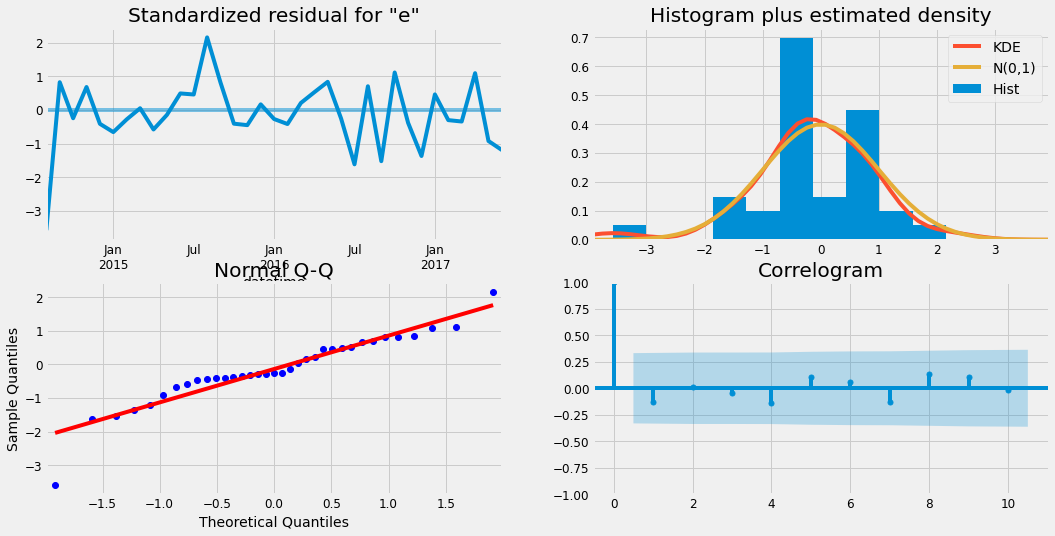

In [27]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

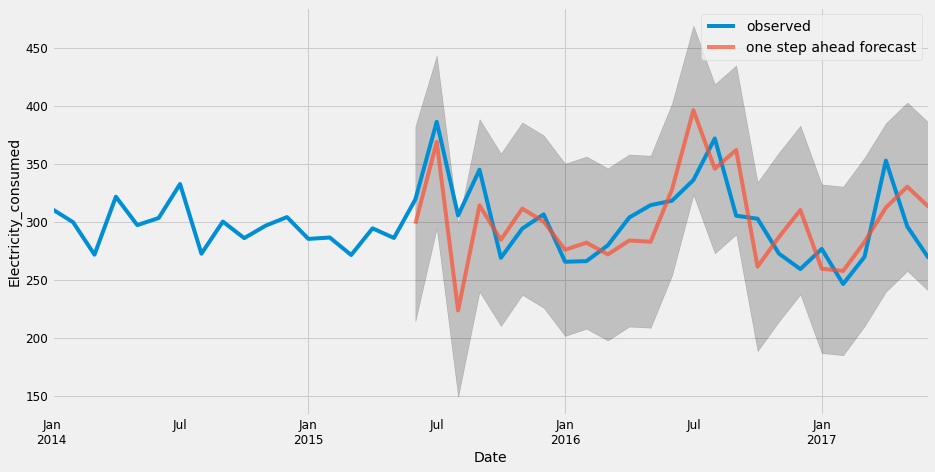

In [28]:
pred = results.get_prediction(start= pd.to_datetime('2015-06-01'),dynamic= False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label= 'observed')
pred.predicted_mean.plot(ax=ax,label='one step ahead forecast',alpha=.7,figsize=(14,7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],color='k',alpha=.2)

ax.set_xlabel("Date")
ax.set_ylabel("Electricity_consumed")
plt.legend()
plt.show()

In [29]:
y_forecasted = pred.predicted_mean
y_true = y['2016-01-01':]
mse = ((y_forecasted - y_true)**2).mean()
print("The mean squared error forecast is {} ".format(round(mse,2)))

The mean squared error forecast is 1067.98 


In [30]:
print("The root mean squared error is {}". format(round(np.sqrt(mse),2)))

The root mean squared error is 32.68


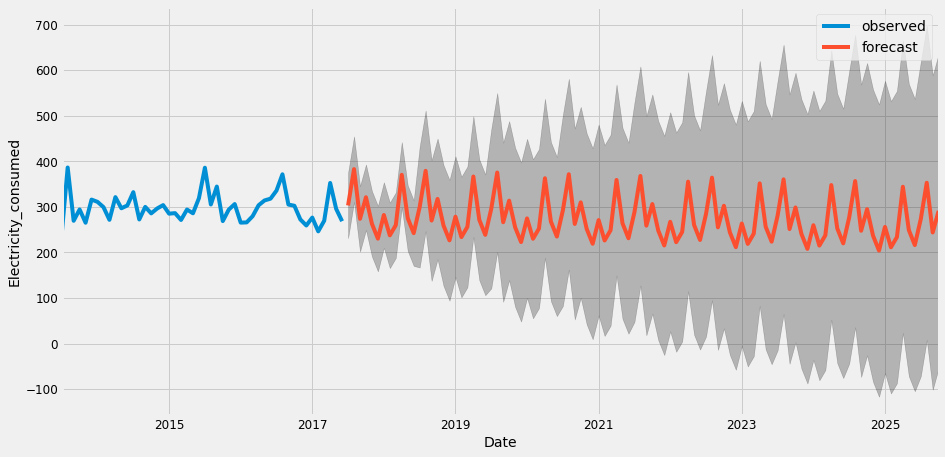

In [31]:
pred_uc = results.get_forecast(steps= 100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label= 'observed',figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax,label= 'forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color= 'k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Electricity_consumed')
plt.legend()
plt.show()